In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# read data
data = pd.read_csv("./data/data.csv",delimiter=";")

In [3]:
import warnings

warnings.filterwarnings("ignore")

# splitting data into two dataframes by column AB_Cohort
data_cohort_A = data[data['AB_Cohort'] == 'A']
data_cohort_B = data[data['AB_Cohort'] == 'B']

# Let's create a set of User_ids, where each User_id will appear only once
unique_user_ids_A = set(data_cohort_A['User_id'])
unique_user_ids_B = set(data_cohort_B['User_id'])

# Let's go through the User_id sets and set Paying to True if at least one entry has 'CountBuy' > 0
for user_id in unique_user_ids_A:
    has_purchase = any(data_cohort_A[data_cohort_A['User_id'] == user_id]['CountBuy'] > 0)
    data_cohort_A.loc[data_cohort_A['User_id'] == user_id, 'Paying'] = has_purchase

for user_id in unique_user_ids_B:
    has_purchase = any(data_cohort_B[data_cohort_B['User_id'] == user_id]['CountBuy'] > 0)
    data_cohort_B.loc[data_cohort_B['User_id'] == user_id, 'Paying'] = has_purchase

# If Paying has not been set for some User_id, fill in the values ​​with False
data_cohort_A['Paying'].fillna(False, inplace=True)
data_cohort_B['Paying'].fillna(False, inplace=True)

# Saving two DataFrames to CSV files
data_cohort_A.to_csv("./data_proc/data_cohort_A.csv", index=False)
data_cohort_B.to_csv("./data_proc/data_cohort_B.csv", index=False)

warnings.filterwarnings("default")

In [4]:
#1.1 Conversion rate

# Function for calculating Conversion Rate
def calculate_conversion_rate(data):
    conversion_rates = []

    for day in range(0, 8):
        day_data = data[data['Retention'] == day]
        users_with_purchase = day_data[day_data['CountBuy'] > 0]['User_id'].nunique()
        total_users = day_data['User_id'].nunique()

        print("user with purchase:", users_with_purchase)
        print("total users:", total_users)

        conversion_rate = (users_with_purchase / total_users) * 100 if total_users > 0 else 0
        conversion_rates.append(conversion_rate)

    return conversion_rates

# Calculating the Conversion Rate for cohorts A and B
conversion_rate_cohort_A = calculate_conversion_rate(data_cohort_A)
conversion_rate_cohort_B = calculate_conversion_rate(data_cohort_B)

# Days (1-7)
days = range(0, 8)



user with purchase: 11
total users: 4317
user with purchase: 7
total users: 1653
user with purchase: 6
total users: 1342
user with purchase: 4
total users: 1217
user with purchase: 4
total users: 1153
user with purchase: 1
total users: 1071
user with purchase: 2
total users: 971
user with purchase: 3
total users: 960
user with purchase: 20
total users: 4319
user with purchase: 8
total users: 1743
user with purchase: 4
total users: 1383
user with purchase: 8
total users: 1221
user with purchase: 7
total users: 1089
user with purchase: 1
total users: 1036
user with purchase: 4
total users: 991
user with purchase: 7
total users: 916


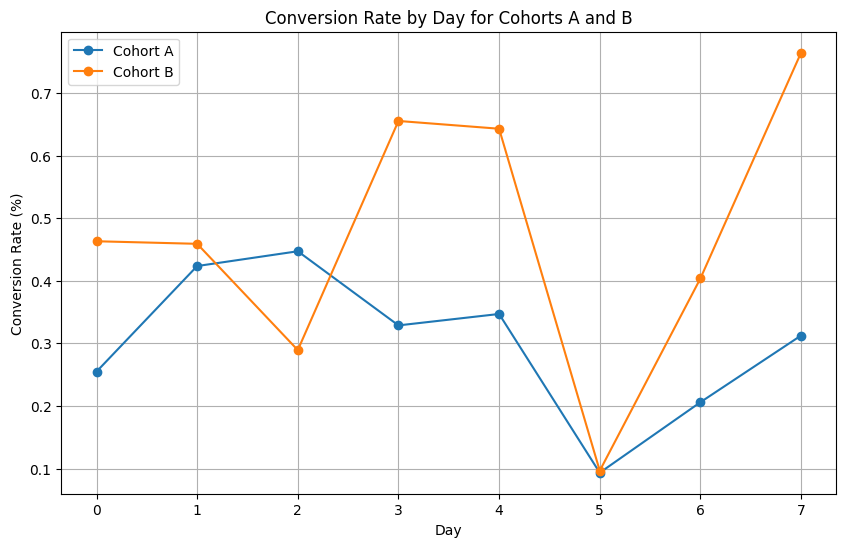

In [5]:
#1.2 Conversion rate graph
# Building a Conversion Rate graph for cohorts A and B
plt.figure(figsize=(10, 6))
plt.plot(days, conversion_rate_cohort_A, label='Cohort A', marker='o')
plt.plot(days, conversion_rate_cohort_B, label='Cohort B', marker='o')

plt.title('Conversion Rate by Day for Cohorts A and B')
plt.xlabel('Day')
plt.ylabel('Conversion Rate (%)')
plt.legend()
plt.grid(True)

# Graph display
plt.show()


In [6]:
# 2.1 Average level and average day of life at which purchases are made
# Function for calculating the average level and the average day of life in which the first purchases are made
def calculate_avg_level_and_day(data):
    cohort_data_with_purchase = data[data['CountBuy'] > 0]

    # We group the data by User_id, then find the first day of life and the first level at which the purchase is made
    first_purchase_data = cohort_data_with_purchase.groupby('User_id').first()

    avg_level = first_purchase_data['MaxLevelPassed'].mean()
    avg_day = first_purchase_data['Retention'].mean()

    return avg_level, avg_day

# We calculate the average level and average day of life for cohorts A and B with purchases
avg_level_cohort_A, avg_day_cohort_A = calculate_avg_level_and_day(data_cohort_A)
avg_level_cohort_B, avg_day_cohort_B = calculate_avg_level_and_day(data_cohort_B)


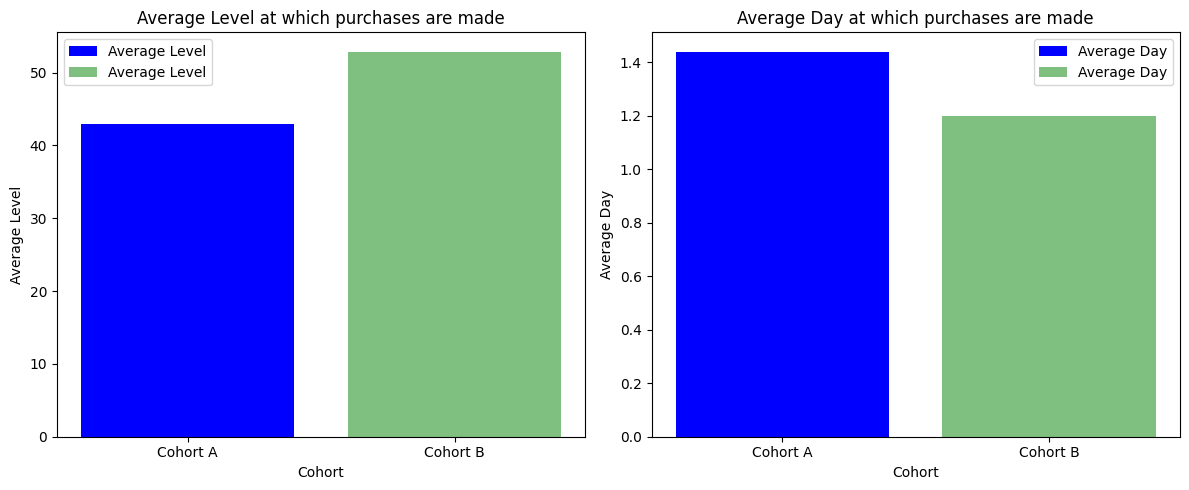

In [7]:
# 2.2 Average level and average day of life at which purchases are made graph
# Charts for average level and average day
plt.figure(figsize=(12, 5))

# Intermediate level chart
plt.subplot(1, 2, 1)
plt.bar(['Cohort A'], avg_level_cohort_A, color='blue', label='Average Level')
plt.bar(['Cohort B'], avg_level_cohort_B, color='green', label='Average Level', alpha=0.5)
plt.title('Average Level at which purchases are made')
plt.xlabel('Cohort')
plt.ylabel('Average Level')
plt.legend()

# Average day chart
plt.subplot(1, 2, 2)
plt.bar(['Cohort A'], avg_day_cohort_A, color='blue', label='Average Day')
plt.bar(['Cohort B'], avg_day_cohort_B, color='green', label='Average Day', alpha=0.5)
plt.title('Average Day at which purchases are made')
plt.xlabel('Cohort')
plt.ylabel('Average Day')
plt.legend()

plt.tight_layout()
plt.show()

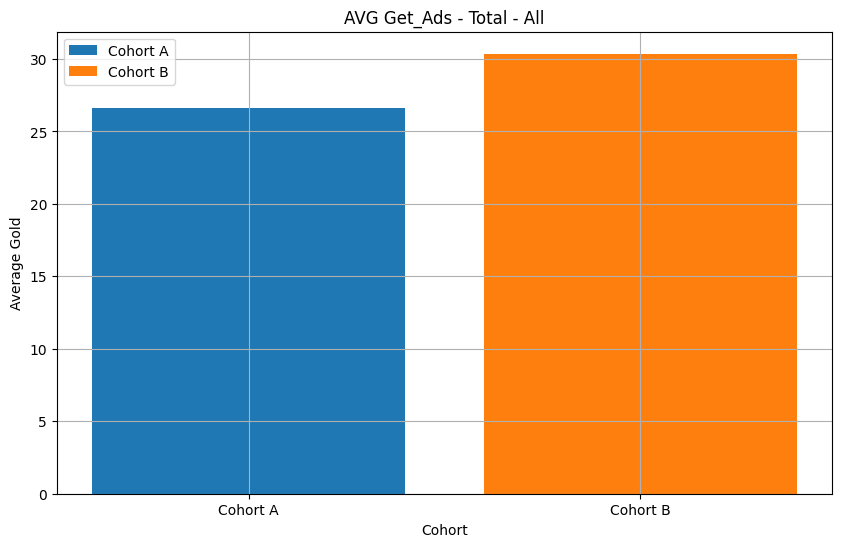

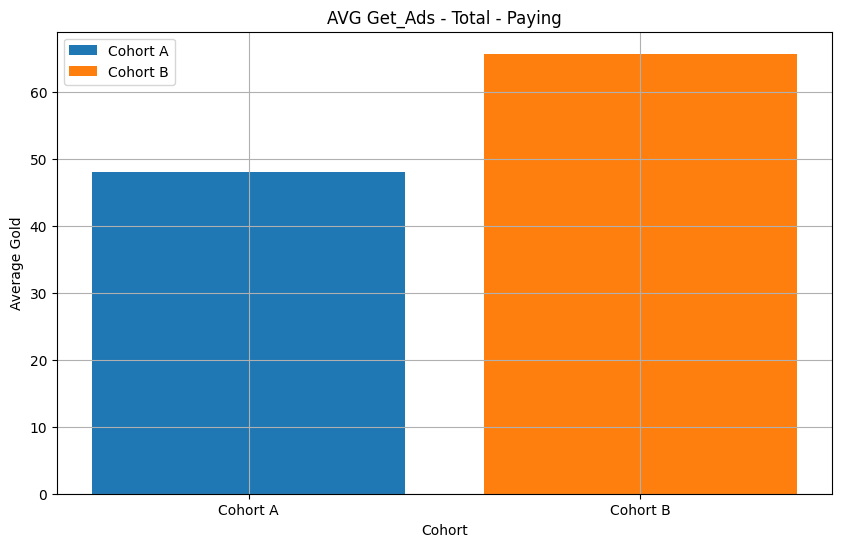

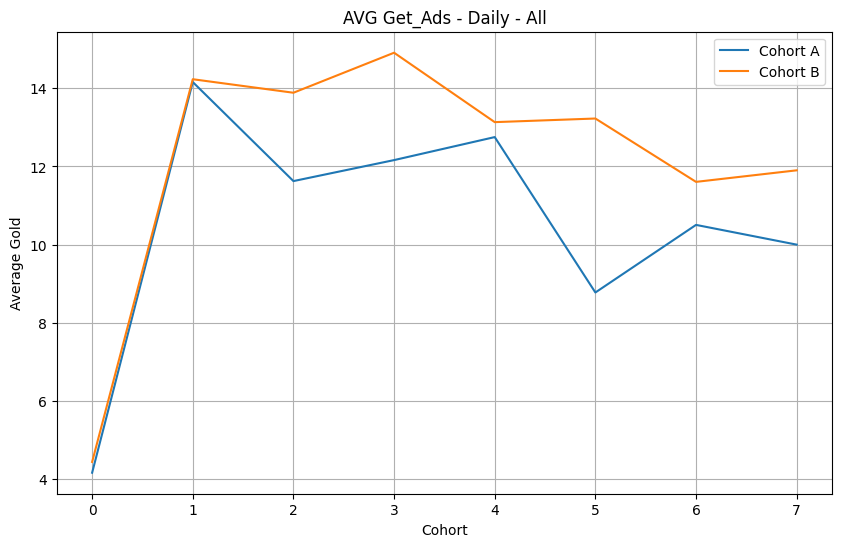

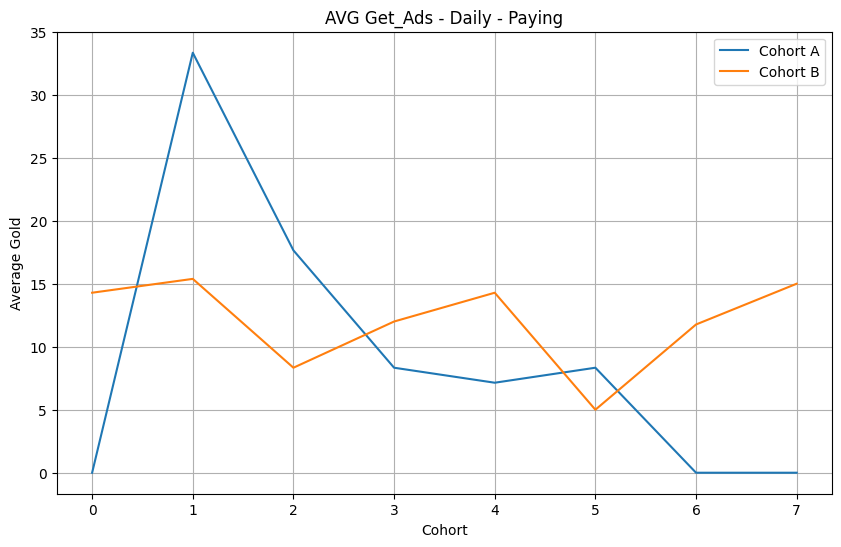

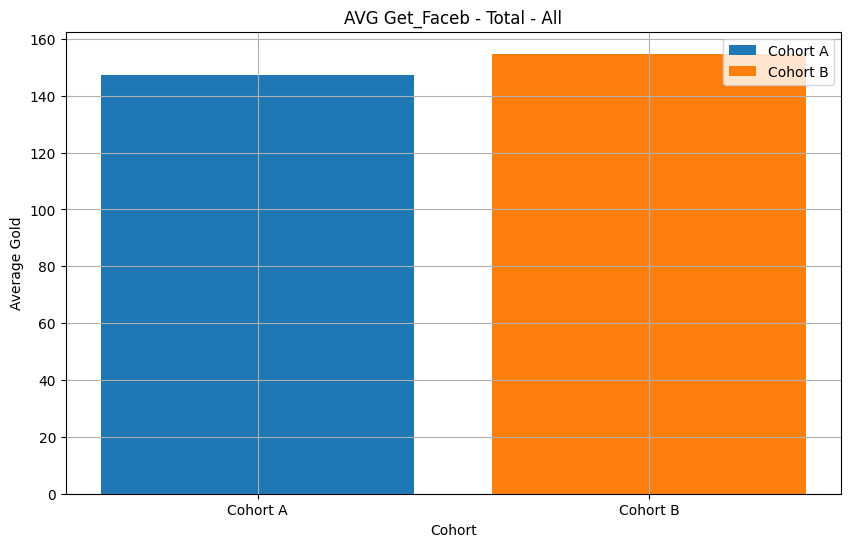

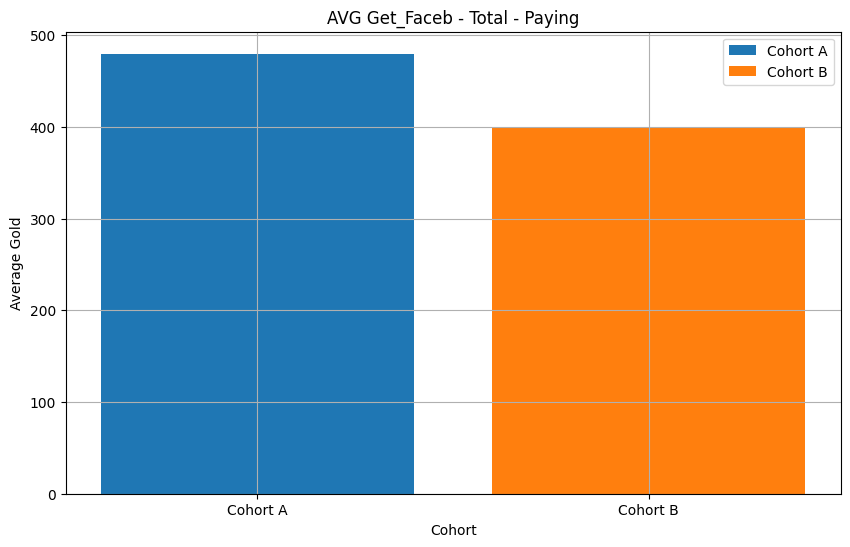

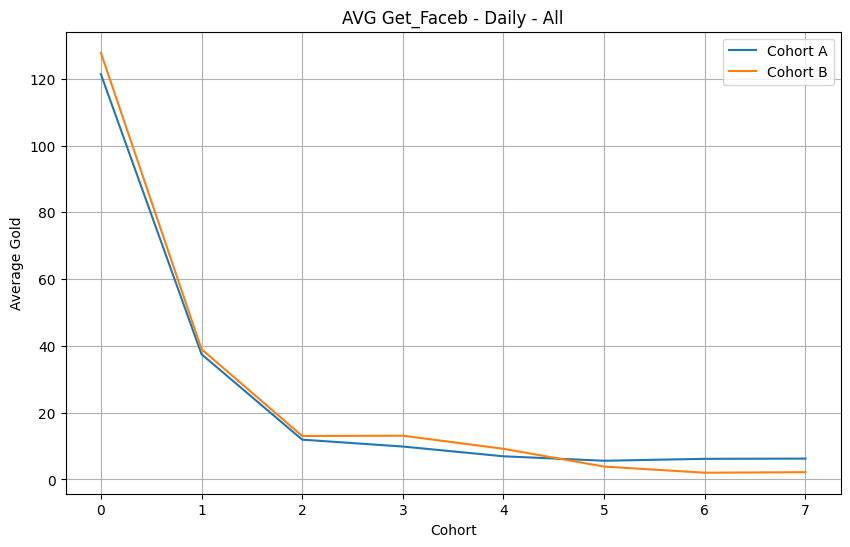

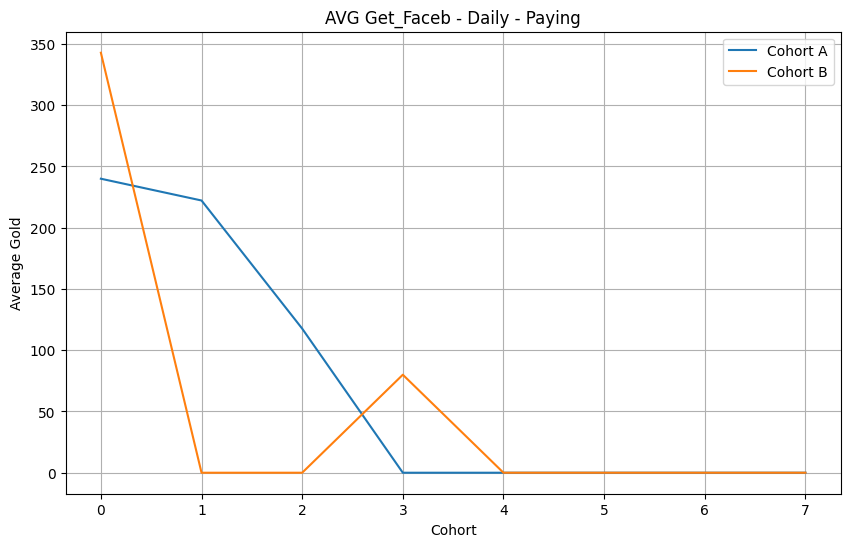

In [8]:
# 3 AVG Amount of gold received for Facebook and advertising
# List of features to analyze
features = ['Get_Ads', 'Get_Faceb']

for feature in features:
    for days_type in ['Total', 'Daily']:
        for player_type in ['All', 'Paying']:
            plt.figure(figsize=(10, 6))
            for cohort in ['A', 'B']:
                filtered_data = data_cohort_A if cohort == 'A' else data_cohort_B

                if player_type == 'Paying':
                    # old version
                    """
                    filtered_data = filtered_data[filtered_data['CountBuy'] > 0]
                    """
                    filtered_data = filtered_data[filtered_data['Paying'] == True]

                if days_type == 'Daily':
                    gold_sum_daily = filtered_data.groupby(['Retention', 'User_id'])[feature].sum().reset_index()
                    gold_mean_daily = gold_sum_daily.groupby(['Retention'])[feature].mean().reset_index()
                    plt.plot(gold_mean_daily['Retention'], gold_mean_daily[feature], label=f'Cohort {cohort}')
                else:
                    gold_sum_total = filtered_data.groupby(['User_id'])[feature].sum().reset_index()
                    gold_mean_total = gold_sum_total[feature].mean()
                    plt.bar([f'Cohort {cohort}'], [gold_mean_total], label=f'Cohort {cohort}')

            plt.title(f'AVG {feature} - {days_type} - {player_type}')
            plt.xlabel('Cohort')
            plt.ylabel('Average Gold')
            plt.legend()
            plt.grid(True)
            plt.show()

